# Week 2 Data Exploration

#### I am importing Philadelphia Parks & Recreation Program Sites (pprsites) data and conducting data exploration. Point location features for all PPR Program site locations. This dataset includes recreation centers, playgrounds, older adult centers, swimming pools, and environmental education centers. This data may be used to differentiate the public access to parks and recreation for communities across Philadelphia, particularly the Logan Triangle. I will document my steps and my preliminary findings. 


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

##### Import CSV file of all Philadelphia Parks and Recreation Program Sites

In [10]:
pprsites = gpd.read_file('PPRSites.csv')

##### Print the first 5 rows of data so see all the columns in the dataset 

In [11]:
pprsites.head()

,X,Y,OBJECTID,PARK_NAME,DPP_ASSET_ID,PROGRAM_TYPE,SITE_CLASS,BUILDING,GYM,LABEL_NUMBER,COMMENTS,DATA_SOURCE,geometry
0,-75.1636341891681,40.053862669122,1,Awbury Park and Recreation Center,604,PPR_REC,B,Y,N,,,Programs 11/2022,None
1,-75.0075107483677,40.1228431723608,2,Daniel Boyle Memorial Recreation Center,1843,PPR_REC,B,Y,N,,,Programs 11/2022,None
2,-75.1698319055514,40.0646864811466,3,Charles M Finley Playground,1989,PPR_REC,A,Y,Y,,,Programs 11/2022,None
3,-75.1747635378688,40.0022212258066,4,James Allen Shuler Playground,1878,PPR_REC,B,Y,N,,,Programs 11/2022,None
4,-75.1715193626166,39.9421185311373,5,Marian Anderson Recreation Center,1901,PPR_REC,A,Y,Y,,,Programs 11/2022,None


##### Add Geometry to CSV file

In [12]:
from shapely.geometry import Point

# Read in the CSV File 

pprsites = pd.read_csv('PPRSites.csv')

# Create a geometry column from the coordinate columns
pprsites['geometry'] = pprsites.apply(lambda X: Point(X.X, X.Y), axis=1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(pprsites, geometry='geometry')

# Confirm Geometry added
pprsites.head()


,X,Y,OBJECTID,PARK_NAME,DPP_ASSET_ID,PROGRAM_TYPE,SITE_CLASS,BUILDING,GYM,LABEL_NUMBER,COMMENTS,DATA_SOURCE,geometry
0,-75.163634,40.053863,1,Awbury Park and Recreation Center,604,PPR_REC,B,Y,N,NaN,,Programs 11/2022,POINT (-75.16363 40.05386)
1,-75.007511,40.122843,2,Daniel Boyle Memorial Recreation Center,1843,PPR_REC,B,Y,N,NaN,,Programs 11/2022,POINT (-75.00751 40.12284)
2,-75.169832,40.064686,3,Charles M Finley Playground,1989,PPR_REC,A,Y,Y,NaN,,Programs 11/2022,POINT (-75.16983 40.06469)
3,-75.174764,40.002221,4,James Allen Shuler Playground,1878,PPR_REC,B,Y,N,NaN,,Programs 11/2022,POINT (-75.17476 40.00222)
4,-75.171519,39.942119,5,Marian Anderson Recreation Center,1901,PPR_REC,A,Y,Y,NaN,,Programs 11/2022,POINT (-75.17152 39.94212)


##### Output above shows the first 5 rows of data in the pprsites dataset

##### Next, count the number of rows and columns in the dataset

In [13]:
pprsites.shape

(222, 13)

##### Output above shows the number of rows and columns in the pprsites dataset

##### Next, examine the dataset information

In [14]:
pprsites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             222 non-null    float64 
 1   Y             222 non-null    float64 
 2   OBJECTID      222 non-null    int64   
 3   PARK_NAME     222 non-null    object  
 4   DPP_ASSET_ID  222 non-null    int64   
 5   PROGRAM_TYPE  222 non-null    object  
 6   SITE_CLASS    222 non-null    object  
 7   BUILDING      222 non-null    object  
 8   GYM           222 non-null    object  
 9   LABEL_NUMBER  0 non-null      float64 
 10  COMMENTS      197 non-null    object  
 11  DATA_SOURCE   222 non-null    object  
 12  geometry      222 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(7)
memory usage: 22.7+ KB


##### Output above shows the columns, data types, and number of null values within each column.

##### Next, count how many PPR Sites don't have or have a gym 

In [15]:
pprsites['GYM'].value_counts()

N    162
Y     60
Name: GYM, dtype: int64

##### Output above shows how many PPR Sites don't have or have a gym

##### Next, plot where PPR sites with and without a gym are located

<AxesSubplot: >

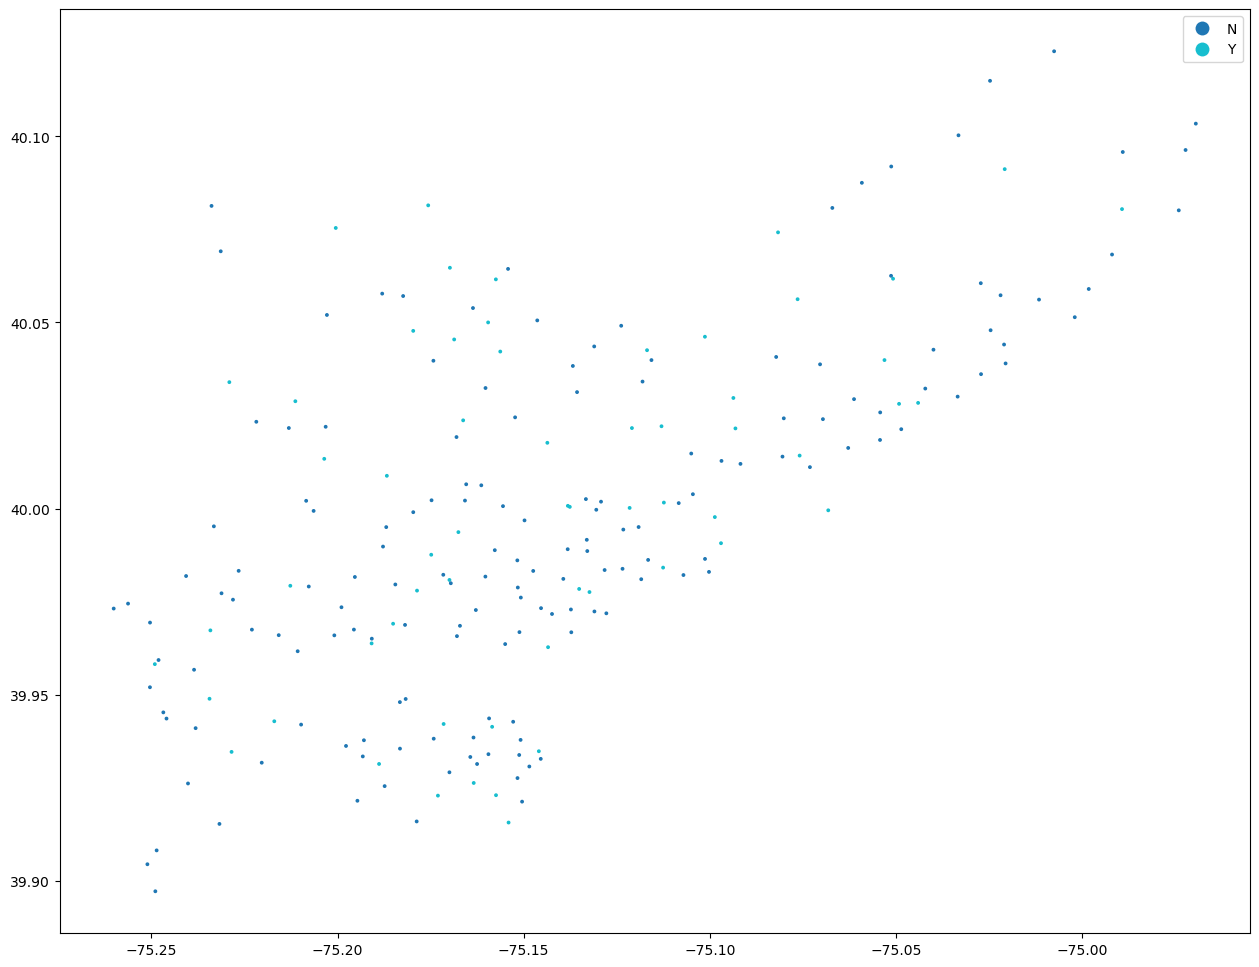

In [16]:
gdf.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'GYM',   # column that defines the color of the dots
            legend = True,     # add a legend           
            markersize = 3,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
)

##### Plot above shows where Parks and Recreational Sites with and without a gym are geographically in the City of Philadelphia based on the geography provided in the geojson dataset.


##### Then, I filter data to view PPR Sites without a gym

In [46]:
nogym_pprsites = pprsites.loc[pprsites['GYM'].isin(['Y'])] 

##### Next, check that data filtered correctly

In [47]:
nogym_pprsites['GYM'].value_counts()

Y    60
Name: GYM, dtype: int64

##### Output above shows that just the PPR Sites with a gym are in the filtered dataset.

##### Next, I import contextily library to add a basemap to the plotted data. I use a standard projection of 4326.

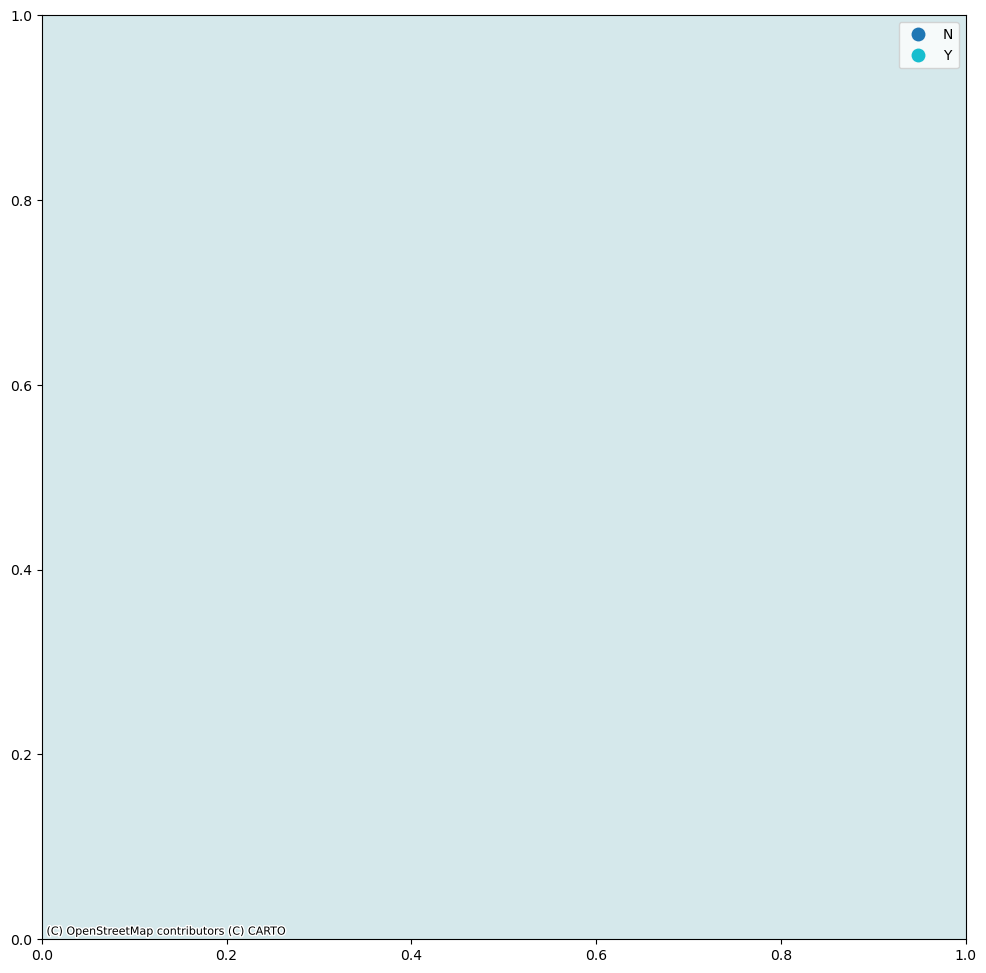

In [42]:
import contextily as ctx

ax = gdf.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'GYM',   # column that defines the color of the dots
            legend = True,     # add a legend           
            markersize = 3,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
)

ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager)

##### Output above shows the final map of the Parks and Recreation sites with or without a gym in Philly with a basemap